<a href="https://colab.research.google.com/github/Mehradtavana/First/blob/main/class5_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['voice.csv']))
print(data.shape)


(3168, 21)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam
from keras.layers import Dense, Dropout
"--------------------------------------------------------"
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['voice.csv']))
"--------------------------------------------------------"
y = data.label
y.replace({'male':0, 'female':1}, inplace=True)
data.drop('label', axis=1 , inplace = True)
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, shuffle=True)
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer =Adam(lr=0.001), metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs= 100, verbose = 0,validation_split=0.1)
loss, accuracy = model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.9117


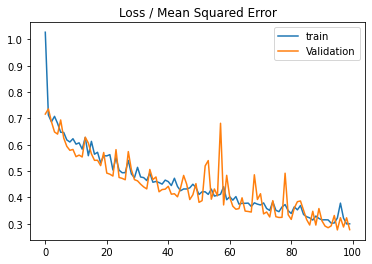

In [ ]:
from matplotlib import pyplot
pyplot.title('Loss / binary_crossentropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='Validation')
pyplot.legend()
pyplot.show()